In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
df = pd.read_csv("Metrics.csv", index_col=0)
df.head()

,login_score,module_score,module_frequency_score
user_id,,,
541,4,4,2
300,4,2,0
343,4,8,6
2646,4,6,2
600,3,6,2


In [3]:
df.shape

(1974, 3)

In [4]:
df["Average"] = df[["login_score", "module_score", "module_frequency_score"]].mean(axis=1).round(2)

In [5]:
df.head()

,login_score,module_score,module_frequency_score,Average
user_id,,,,
541,4,4,2,3.33
300,4,2,0,2.00
343,4,8,6,6.00
2646,4,6,2,4.00
600,3,6,2,3.67


In [6]:

#  Prepare the data
X = df[['login_score', 'module_score', 'module_frequency_score']]

#  Train the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

#  Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

df.head()


C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,login_score,module_score,module_frequency_score,Average,Cluster
user_id,,,,,
541,4,4,2,3.33,4
300,4,2,0,2.00,3
343,4,8,6,6.00,1
2646,4,6,2,4.00,2
600,3,6,2,3.67,2


In [7]:
kmeans.inertia_

3277.3226242116853

In [9]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("\nSilhouette Score:", silhouette_avg)


Silhouette Score: 0.5331798319281327


In [10]:
# Reduce Dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca

array([[ 0.11426356, -0.94266507],
       [-2.47891952, -2.07121332],
       [ 5.30062971,  1.31443143],
       ...,
       [-0.21384161, -0.16850468],
       [ 4.3258213 ,  0.05521406],
       [-5.40971486,  1.15609733]])

In [13]:
# Create a DataFrame for PCA results
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
#df_pca['Cluster'] = df['Cluster']

df_pca['cluster'] = kmeans.labels_

df_pca.head()

,PCA1,PCA2,cluster
0,0.114264,-0.942665,4
1,-2.478920,-2.071213,3
2,5.300630,1.314431,1
3,1.732638,-1.073334,2
4,1.404533,-0.299174,2


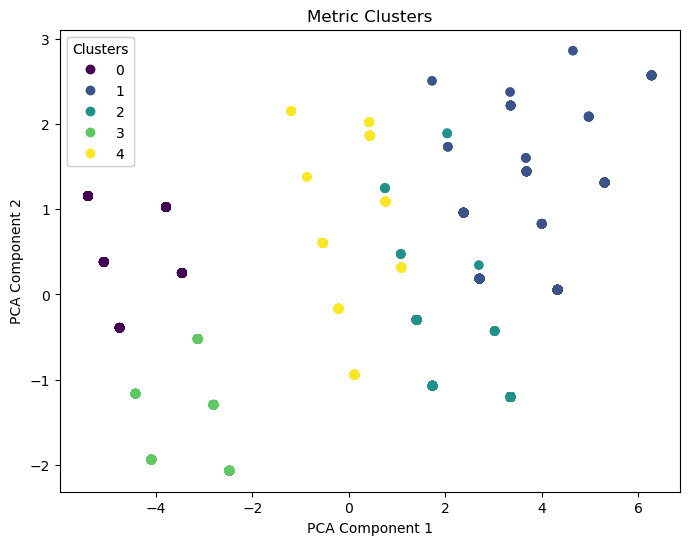

In [18]:
# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"], cmap='viridis')

# Add a title and axis labels
plt.title("Metric Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Create a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Display the plot
plt.show()


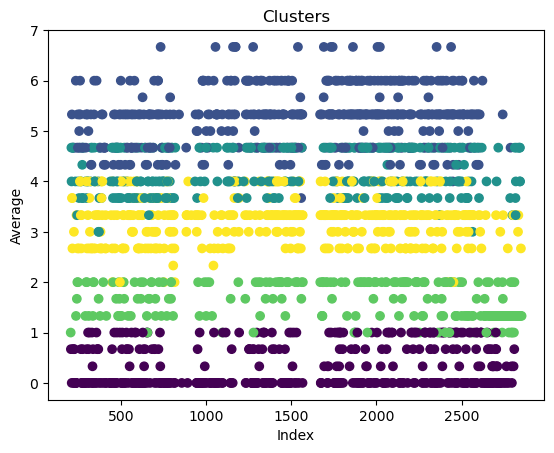

In [19]:
# Plot the clusters
plt.scatter(df.index, df['Average'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Average')
plt.title('Clusters')
plt.show()

In [20]:
#  Prepare the data
X = df[["Average"]]

#  Train the KMeans model
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit(X)

#  Add cluster labels to the DataFrame
df['Cluster2'] = kmeans2.labels_

df.head()

C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,login_score,module_score,module_frequency_score,Average,Cluster,Cluster2
user_id,,,,,,
541,4,4,2,3.33,4,1
300,4,2,0,2.00,3,4
343,4,8,6,6.00,1,3
2646,4,6,2,4.00,2,0
600,3,6,2,3.67,2,1


In [11]:
kmeans2.inertia_

234.68322589816478

In [12]:
silhouette_avg = silhouette_score(X, kmeans2.labels_)
print("\nSilhouette Score:", silhouette_avg)


Silhouette Score: 0.655489653586412


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


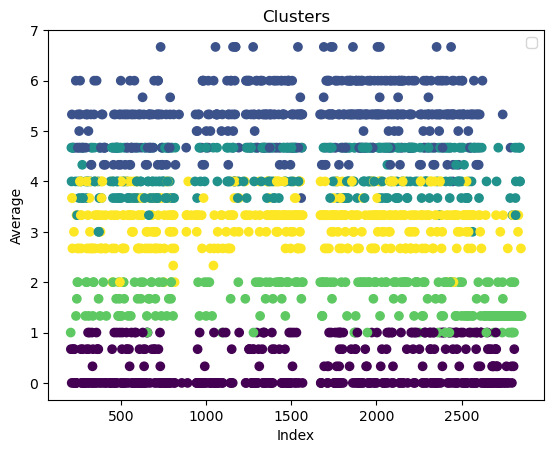

In [22]:
#  Plot the clusters
plt.scatter(df.index, df['Average'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Average')
plt.title('Clusters')
plt.legend()
plt.show()

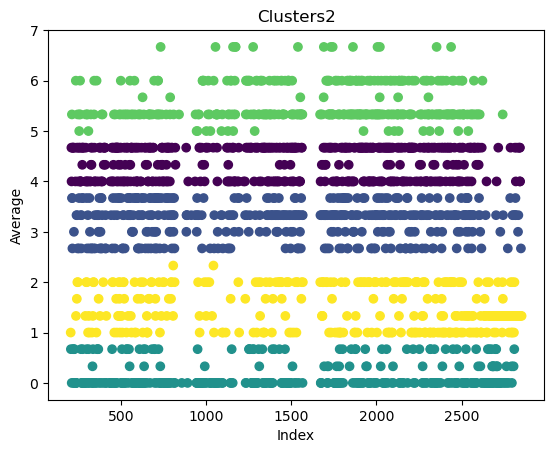

In [23]:
#  Plot the clusters
plt.scatter(df.index, df['Average'], c=df['Cluster2'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Average')
plt.title('Clusters2')
plt.show()

In [24]:
kmeans.inertia_

3277.3226242116853

In [25]:
kmeans2.inertia_

234.68322589816475

In [26]:
features = ['login_score', 'module_score', 'module_frequency_score']
X = df[features]
y = df['Cluster']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42)


#X_scaled[:5]
y_train

user_id
2283    3
1520    4
2700    0
2517    0
2589    0
       ..
2347    3
555     1
1499    0
265     0
2234    3
Name: Cluster, Length: 1579, dtype: int32

In [27]:
DT_model = DecisionTreeRegressor(random_state=42)

In [28]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

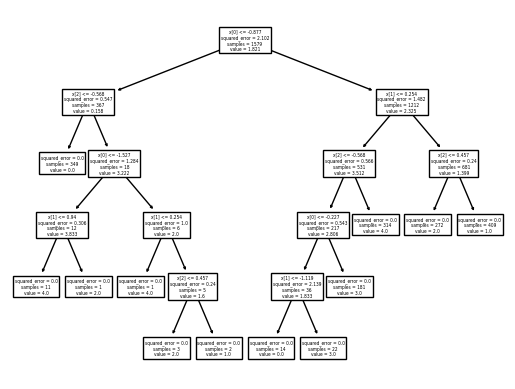

In [29]:
plot_tree(DT_model, max_depth=6)
plt.show()